# Teorema de Bayes

In [2]:
#!pip install -U scipy seaborn
#!pip install -U seaborn
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Definicion
Bayes define la probabilidad posterior como la probabilidad apriori respecto de la evidencia

$P(x|y)=\frac{P(y|x)*P(x)}{P(y)}$

In [3]:
# Bayes's rule

def bayes_rule(p_x, p_y_given_x, p_y):
# calculate P(X|Y) given P(X), P(Y|X), P(Y)
	p_x_given_y = (p_y_given_x * p_x) / p_y
	return p_x_given_y

In [5]:
# Joint Probability Estimation
from random import choice
from scipy.stats import norm

def JointProb(feature1,feature2,Nbins):
    #===Concatenate All Features===#
    numFrames = len(feature1)
    allFeatures = np.zeros((2,numFrames))
    allFeatures[0,:] = feature1
    allFeatures[1,:] = feature2
    
    #===Create the Array to hold all the Bins===#
    numBins = 2*Nbins;
    allBins = np.zeros((allFeatures.shape[0],numBins+1))

    #===Find the maximum and minimum of each feature===#
    allRanges = np.zeros((allFeatures.shape[0],2))
    for f in range(allFeatures.shape[0]):
        allRanges[f,0] = np.amin(allFeatures[f,:])
        allRanges[f,1] = np.amax(allFeatures[f,:])
    
    #===Create the Array to hold all the individual feature probabilities===#
    allIndividualProbs = np.zeros((allFeatures.shape[0],numBins))
    #===Grab all the Individual Probs and the Bins===#
    for f in range(allFeatures.shape[0]):
        freqhist, binedges = np.histogram(allFeatures[f,:],bins=numBins,range=[0,np.pi/2],density=False);
        allBins[f,:] = binedges
        allIndividualProbs[f,:] = freqhist
    
    #===Create the joint probability array===#
    jointProbs = np.zeros((numBins,numBins))
    
    #===Compute the joint probability distribution===#
    import time
    numElements = 0;
    for b1 in range(numBins):
        if b1==0 or b1==numBins-1:
            print(str(b1)+' of '+str(numBins-1))
            t1 = time.time()
        for b2 in range(numBins):
            for f1 in range(numFrames):
                for f2 in range(numFrames):
                    if ( ( (feature1[f1] >= allBins[0,b1]) and (feature1[f1] <= allBins[0,b1+1]) ) and ((feature2[f2] >= allBins[1,b2]) and (feature2[f2] <= allBins[1,b2+1])) ):
                        jointProbs[b1,b2] += 1;
                        numElements += 1;
        if b1==0 or b1==numBins:
            tt = time.time()-t1
            print('time: '+str(tt)+' sec')
        jointProbs /= numElements;
    return jointProbs

In [6]:
import math
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

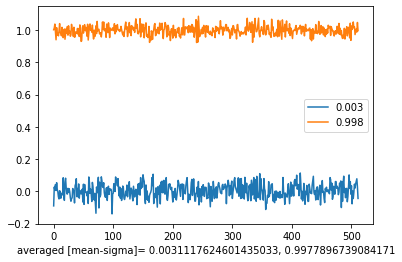

In [7]:
# moment estimates
expected_value = lambda values: sum(values) / len(values)
standard_deviation = lambda values, expected_value: np.sqrt(sum([(v - expected_value)**2 for v in values])  / len(values))

# pdf model
np.random.seed(1) #
Nmodel = 2**16
mu, sigma = 0, 1
population = np.random.normal(mu, sigma, Nmodel)
mean = expected_value(population)

# samples selected
Nsample = 2**9
ysd = []
ym = []
for n in range(Nsample):
    randomly_selected_items = [choice(population) for _ in range(Nsample)]
    mean = expected_value(randomly_selected_items)
    ym.append(mean)
    s_d = standard_deviation(randomly_selected_items, mean)
    ysd.append(s_d)
    #print(mean," \t ",s_d)

s = np.arange(0, Nsample,1)
plt.plot(s,ym,s,ysd)
plt.xlabel(f'averaged [mean-sigma]= {expected_value(ym)}, {expected_value(ysd)}')
plt.legend([f'{expected_value(ym):.3f}', f'{expected_value(ysd):.3f}'])
plt.show()

In [8]:
feature1 = ym
feature2 = ysd

0 of 43
time: 4.466038703918457 sec
43 of 43


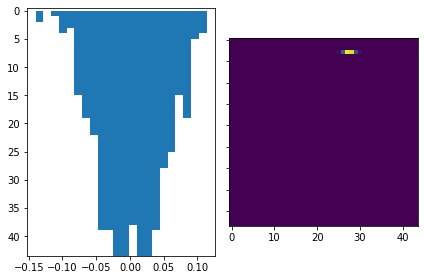

NameError: name 'jointProbs' is not defined

In [9]:
#import seaborn as sns

Nbins = int(np.ceil(1 + 3.3*np.log(Nsample)))  #  Sturge’s Rule K = 1 + 3. 322 logN

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(feature1, bins=Nbins)
axs[1].hist(feature2, bins=Nbins)

 

plt.imshow(JointProb(feature1,feature2,Nbins))
plt.show()
plt.plot(np.sum(jointProbs,axis=0))
plt.plot(np.sum(jointProbs,axis=1))
plt.legend(['Marg X','Marg Y'])
plt.show()
#P(\text{y}=y | \text{x}=x) = \frac{P(\text{y}=y, \text{x}=x)}{P(\text{x}=x)} => conditional probability

print('integrate X: '+str(np.sum(np.sum(jointProbs,axis=0))))
print('integrate Y: '+str(np.sum(np.sum(jointProbs,axis=1))))
print('integrate all: '+str(np.sum(jointProbs.ravel())))

In [ ]:
# P(X) Prior
p_x = normpdf(expected_value(ym),expected_value(ym),expected_value(ysd))

# P(Y) Evidence
p_y = normpdf(expected_value(ysd),expected_value(ym),expected_value(ysd))

# P(Y|X) Likelihood
p_y_given_x = p_y * p_x/ p_x
# calculate P(X|Y) Posterior probability
Post = bayes_rule(p_x, p_y_given_x, p_y)
# summarize
print('P(X=mu+|Y=sigma+) = %.3f%%' % (Post  * 100))